# Analyze 311 dataset from NYC

## 1. step

Load dataset and check dimensions

In [19]:
# Read 311 data from local file system

import pandas as pd

df_311 = pd.read_csv("fhrw-4uyv.csv", parse_dates=True)

In [20]:
# get the dataset dimensions

num_rows, num_cols = df_311.shape
print ("The 311 dataset has %d rows and %d columns" % (num_rows,num_cols))

df_311.head()

The 311 dataset has 5735329 rows and 15 columns


,address_type,borough,city,closed_date,complaint_type,created_date,incident_address,incident_zip,latitude,location_type,longitude,resolution_description,status,street_name,unique_key
0,NaN,Unspecified,NaN,2013-01-11T15:01:56.000,HPD Literature Request,2013-01-11T13:25:34.000,NaN,NaN,NaN,NaN,NaN,The literature has been mailed. If it has not ...,Closed,NaN,24765056
1,ADDRESS,QUEENS,Queens Village,2019-03-30T08:58:02.000,PAINT/PLASTER,2018-08-11T19:19:41.000,104-34 219 STREET,11429.0,40.711539,RESIDENTIAL BUILDING,-73.735724,The Department of Housing Preservation and Dev...,Closed,219 STREET,39981834
2,ADDRESS,QUEENS,Queens Village,2019-03-30T08:58:01.000,APPLIANCE,2018-08-11T19:19:41.000,104-34 219 STREET,11429.0,40.711539,RESIDENTIAL BUILDING,-73.735724,The Department of Housing Preservation and Dev...,Closed,219 STREET,39982698
3,ADDRESS,QUEENS,Queens Village,2019-03-30T08:58:01.000,UNSANITARY CONDITION,2018-08-11T19:19:41.000,104-34 219 STREET,11429.0,40.711539,RESIDENTIAL BUILDING,-73.735724,The Department of Housing Preservation and Dev...,Closed,219 STREET,39987943
4,ADDRESS,QUEENS,Saint Albans,2019-03-30T08:58:02.000,DOOR/WINDOW,2018-10-23T19:27:06.000,116-35 195 STREET,11412.0,40.693715,RESIDENTIAL BUILDING,-73.757117,The Department of Housing Preservation and Dev...,Closed,195 STREET,40636028


In [21]:
# analyze dataset columns and types

print("311 dataset columns:\n", df_311.columns)
print("\n311 dataset data types:\n", df_311.dtypes)

311 dataset columns:
 Index(['address_type', 'borough', 'city', 'closed_date', 'complaint_type',
       'created_date', 'incident_address', 'incident_zip', 'latitude',
       'location_type', 'longitude', 'resolution_description', 'status',
       'street_name', 'unique_key'],
      dtype='object')

311 dataset data types:
 address_type               object
borough                    object
city                       object
closed_date                object
complaint_type             object
created_date               object
incident_address           object
incident_zip              float64
latitude                  float64
location_type              object
longitude                 float64
resolution_description     object
status                     object
street_name                object
unique_key                  int64
dtype: object


## 2. step

Complaints should be analyzed, so let's see what kind of complaints we have

In [22]:
# see what complaint types we have

df_311['complaint_type'].unique()

array(['HPD Literature Request', 'PAINT/PLASTER', 'APPLIANCE',
       'UNSANITARY CONDITION', 'DOOR/WINDOW', 'WATER LEAK', 'PLUMBING',
       'GENERAL', 'FLOORING/STAIRS', 'ELECTRIC', 'ELEVATOR',
       'OUTSIDE BUILDING', 'SAFETY', 'HEAT/HOT WATER', 'HEATING',
       'GENERAL CONSTRUCTION', 'PAINT - PLASTER', 'NONCONST',
       'CONSTRUCTION', 'AGENCY', 'STRUCTURAL', 'VACANT APARTMENT'],
      dtype=object)

The top 4 complaints are:

 complaint_type
HEAT/HOT WATER          1131174
HEATING                  887869
PLUMBING                 690130
GENERAL CONSTRUCTION     500863
dtype: int64


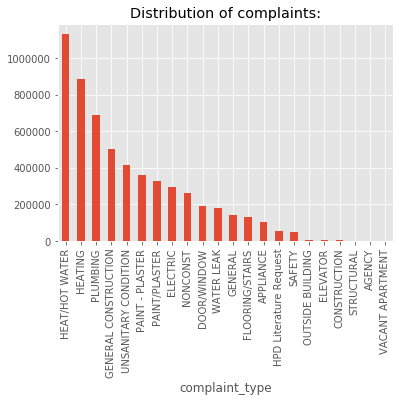

In [23]:
# see how the complaints are distributed

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline 

mpl.style.use('ggplot') # for ggplot-like style

df_311_complaints = df_311.groupby(['complaint_type']).size().sort_values(ascending=False)

print ("The top 4 complaints are:\n\n", df_311_complaints.head(4))

df_311_complaints.plot('bar', title="Distribution of complaints:")

## 3. step 

It's said that the complaints are rising, so check against time (create date)

In [34]:
# create month column for grouping

df_311['month'] = pd.to_datetime(df_311['created_date']).apply(lambda x: pd.datetime(year=x.year, month=x.month, day=1))

df_311.head()

,address_type,borough,city,closed_date,complaint_type,created_date,incident_address,incident_zip,latitude,location_type,longitude,resolution_description,status,street_name,unique_key,created_date2,month
0,NaN,Unspecified,NaN,2013-01-11T15:01:56.000,HPD Literature Request,2013-01-11T13:25:34.000,NaN,NaN,NaN,NaN,NaN,The literature has been mailed. If it has not ...,Closed,NaN,24765056,2013-01-11 13:25:34,2013-01-01
1,ADDRESS,QUEENS,Queens Village,2019-03-30T08:58:02.000,PAINT/PLASTER,2018-08-11T19:19:41.000,104-34 219 STREET,11429.0,40.711539,RESIDENTIAL BUILDING,-73.735724,The Department of Housing Preservation and Dev...,Closed,219 STREET,39981834,2018-08-11 19:19:41,2018-08-01
2,ADDRESS,QUEENS,Queens Village,2019-03-30T08:58:01.000,APPLIANCE,2018-08-11T19:19:41.000,104-34 219 STREET,11429.0,40.711539,RESIDENTIAL BUILDING,-73.735724,The Department of Housing Preservation and Dev...,Closed,219 STREET,39982698,2018-08-11 19:19:41,2018-08-01
3,ADDRESS,QUEENS,Queens Village,2019-03-30T08:58:01.000,UNSANITARY CONDITION,2018-08-11T19:19:41.000,104-34 219 STREET,11429.0,40.711539,RESIDENTIAL BUILDING,-73.735724,The Department of Housing Preservation and Dev...,Closed,219 STREET,39987943,2018-08-11 19:19:41,2018-08-01
4,ADDRESS,QUEENS,Saint Albans,2019-03-30T08:58:02.000,DOOR/WINDOW,2018-10-23T19:27:06.000,116-35 195 STREET,11412.0,40.693715,RESIDENTIAL BUILDING,-73.757117,The Department of Housing Preservation and Dev...,Closed,195 STREET,40636028,2018-10-23 19:27:06,2018-10-01


In [35]:
# group by complaint type and month

df_311_complaints_month = df_311.groupby(['complaint_type', 'month']).size().reset_index()
df_311_complaints_month.columns = ['complaint_type', 'month', 'count']

df_311_complaints_month.head()

df_311_complaints_month.set_index('complaint_type', inplace=True)
df_311_complaints_month = df_311_complaints_month.pivot_table('count', index=['month'], columns=['complaint_type']).fillna(0)

df_311_complaints_month.head()

complaint_type,AGENCY,APPLIANCE,CONSTRUCTION,DOOR/WINDOW,ELECTRIC,ELEVATOR,FLOORING/STAIRS,GENERAL,GENERAL CONSTRUCTION,HEAT/HOT WATER,...,NONCONST,OUTSIDE BUILDING,PAINT - PLASTER,PAINT/PLASTER,PLUMBING,SAFETY,STRUCTURAL,UNSANITARY CONDITION,VACANT APARTMENT,WATER LEAK
month,,,,,,,,,,,,,,,,,,,,,
2010-01-01,0.0,1180.0,66.0,0.0,3575.0,0.0,0.0,0.0,12119.0,0.0,...,5190.0,0.0,7967.0,0.0,10720.0,0.0,0.0,0.0,0.0,0.0
2010-02-01,0.0,998.0,88.0,0.0,2981.0,0.0,0.0,0.0,9913.0,0.0,...,4277.0,0.0,7018.0,0.0,9332.0,0.0,0.0,0.0,0.0,0.0
2010-03-01,0.0,1217.0,113.0,0.0,3393.0,0.0,0.0,0.0,12531.0,0.0,...,5119.0,0.0,10589.0,0.0,13239.0,0.0,0.0,0.0,0.0,0.0
2010-04-01,0.0,1071.0,103.0,0.0,2749.0,0.0,0.0,0.0,10179.0,0.0,...,4735.0,0.0,7940.0,0.0,8784.0,0.0,0.0,0.0,0.0,0.0
2010-05-01,0.0,1012.0,97.0,0.0,2690.0,0.0,0.0,0.0,9031.0,0.0,...,4803.0,0.0,6852.0,0.0,7492.0,0.0,0.0,0.0,0.0,0.0


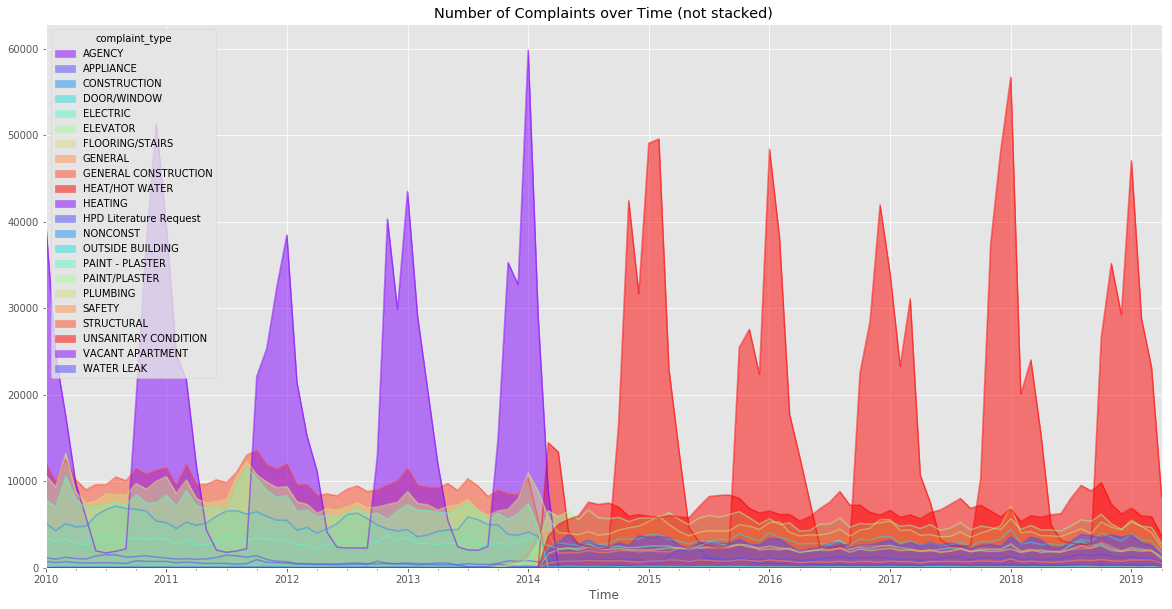

In [36]:
# visualize complaint types over time

viridis = cm.get_cmap('rainbow', 22)
newcolors = viridis(np.linspace(0, 1, 10))

ax = df_311_complaints_month.plot(kind='area', figsize=(20,10), stacked=False, color=newcolors)
ax.set_xlabel('Time')
ax.set_title('Number of Complaints over Time (not stacked)')

plt.show()

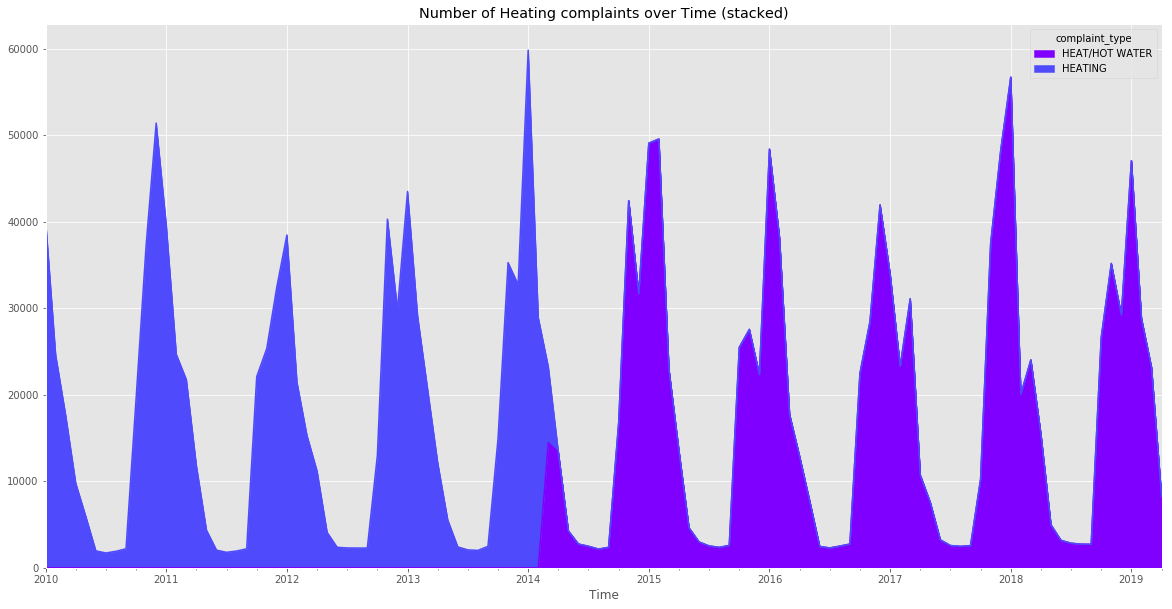

In [37]:
# 'HEATING' might have been replaced 'HEAT/HOT WATER' in 2015, so compare just these two

ax = df_311_complaints_month[['HEAT/HOT WATER', 'HEATING']].plot(kind='area', figsize=(20,10), stacked=True, color=newcolors)
ax.set_xlabel('Time')
ax.set_title('Number of Heating complaints over Time (stacked)')

plt.show()

## 4. step

Complaints related to heating are high in winter times. Compare complaints about heating with the other complaints.

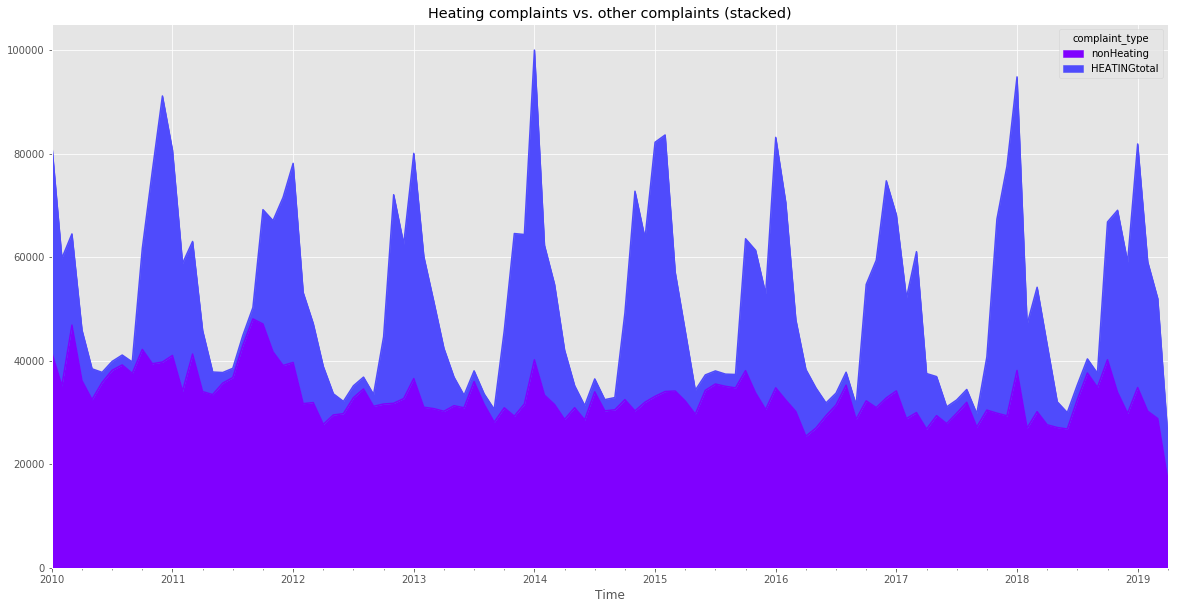

In [38]:
# compare 'HEATING' with all other complaints

df_311_complaints_month2 = df_311_complaints_month

df_311_complaints_month2['HEATINGtotal'] = df_311_complaints_month['HEATING'] + df_311_complaints_month['HEAT/HOT WATER']
#df_311_complaints_month2.drop(['HEATING', 'HEAT/HOT WATER'], axis=1, inplace=True)

collist = ['AGENCY', 'APPLIANCE', 'CONSTRUCTION', 'DOOR/WINDOW', 'ELECTRIC',
       'ELEVATOR', 'FLOORING/STAIRS', 'GENERAL', 'GENERAL CONSTRUCTION',
       'HPD Literature Request', 'NONCONST',
       'OUTSIDE BUILDING', 'PAINT - PLASTER', 'PAINT/PLASTER', 'PLUMBING',
       'SAFETY', 'STRUCTURAL', 'UNSANITARY CONDITION', 'VACANT APARTMENT',
       'WATER LEAK']
df_311_complaints_month2['nonHeating'] = df_311_complaints_month2.loc[:,collist].sum(axis=1)

ax = df_311_complaints_month2[['nonHeating', 'HEATINGtotal']].plot(kind='area', figsize=(20,10), stacked=True, color=newcolors)
ax.set_xlabel('Time')
ax.set_title('Heating complaints vs. other complaints (stacked)')

plt.show()

## Result

In Winter, the number of complaints is twice as high as in summer. This is due to the complaints about Heating. So the recommendation is to look at those first.